In [2]:
import psycopg2
import psycopg2.extras
import shapefile
from configparser import ConfigParser

parser =ConfigParser()
_= parser.read ('notebook.cfg')
username = parser.get ('pgadmin', 'username')
pwd = parser.get ('pgadmin', 'pwd')

host = "cyclability.postgres.database.azure.com"
dbname = "project3"
user = username
password = pwd
sslmode = "require"

conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string) 
print("Connection established")

Connection established


In [3]:
def pgquery( conn, sqlcmd, args=None, msg=False, returntype='tuple'):
    """ utility function to execute some SQL query statement
        it can take optional arguments (as a dictionary) to fill in for placeholders in the SQL
        will return the complete query result as return value - or in case of error: None
        error and transaction handling built-in (by using the 'with' clauses)"""
    retval = None
    with conn:
        cursortype = None if returntype != 'dict' else psycopg2.extras.RealDictCursor
        with conn.cursor(cursor_factory=cursortype) as cur:
            try:
                if args is None:
                    cur.execute(sqlcmd)
                else:
                    cur.execute(sqlcmd, args)
                if (cur.description != None ):
                    retval = cur.fetchall() # we use fetchall() as we expect only _small_ query results
                if msg != False:
                    print("success: " + msg)
            except psycopg2.DatabaseError as e:
                if e.pgcode != None and msg:
                    print("db read error: "+msg)
                    print(e)
            except Exception as e:
                print(e)
    return retval

In [3]:
# Connect to the database
conn = pgconnect()

connected


In [4]:
# data cleaning function
import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

In [5]:
import csv
import pprint

#load data BusinessStats
data_BusinessStats = list(csv.DictReader(open('BusinessStats.csv')))

# data cleaning
DEFAULT_VALUE = 0
clean(data_BusinessStats, "area_id", int, DEFAULT_VALUE)
clean(data_BusinessStats, "num_businesses", int, "0")
clean(data_BusinessStats, "retail_trade", int, "0")
clean(data_BusinessStats, "accommodation_and_food_services", int, "0")
clean(data_BusinessStats, "health_care_and_social_assistance", int, "0")
clean(data_BusinessStats, "education_and_training", int, "0")
clean(data_BusinessStats, "arts_and_recreation_services", int, "0")

# Create the table and insert rows
BusinessStats_schema = """CREATE TABLE IF NOT EXISTS BusinessStats(
                          area_id                            INTEGER PRIMARY KEY,
                          num_businesses                     INTEGER,
                          retail_trade                       INTEGER,
                          accommodation_and_food_services    INTEGER,
                          health_care_and_social_assistance  INTEGER,
                          education_and_training             INTEGER,
                          arts_and_recreation_services       INTEGER
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS BusinessStats", None, "Reset Table BusinessStats")
pgquery (conn, BusinessStats_schema, None, "Create Table BusinessStats")

# sql insert statement
insert_stmt = (
  "INSERT INTO BusinessStats(area_id, num_businesses, retail_trade, accommodation_and_food_services, health_care_and_social_assistance, education_and_training, arts_and_recreation_services) "
  "VALUES (%(area_id)s, %(num_businesses)s, %(retail_trade)s, %(accommodation_and_food_services)s, %(health_care_and_social_assistance)s, %(education_and_training)s, %(arts_and_recreation_services)s)"
)

#insert each row to the database
for row in data_BusinessStats:
    pgquery(conn, insert_stmt, row, "row inserted")

Replacing  with 0 in column num_businesses
Replacing  with 0 in column num_businesses
Replacing  with 0 in column num_businesses
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column retail_trade
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column accommodation_and_food_services
Replacing  with 0 in column health_care_and_social_assistance
R

In [6]:
#load data CensusStats
data_CensusStats = list(csv.DictReader(open('CensusStats.csv')))

# data cleaning
DEFAULT_VALUE = None
clean(data_CensusStats, "area_id", int, DEFAULT_VALUE)
clean(data_CensusStats, "median_annual_household_income", int, "0")
clean(data_CensusStats, "avg_monthly_rent", int, "0")

# Create the table and insert rows
CensusStats_schema = """CREATE TABLE IF NOT EXISTS CensusStats(
                          area_id                            INTEGER PRIMARY KEY,
                          median_annual_household_income     INTEGER,
                          avg_monthly_rent                   INTEGER
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS CensusStats", None, "Reset Table CensusStats")
pgquery (conn, CensusStats_schema, None, "Create Table CensusStats")

# sql insert statement
insert_stmt = (
  "INSERT INTO CensusStats(area_id, median_annual_household_income, avg_monthly_rent) "
  "VALUES (%(area_id)s, %(median_annual_household_income)s, %(avg_monthly_rent)s)"
)

#insert each row to the database
for row in data_CensusStats:
    pgquery(conn, insert_stmt, row, "row inserted")

Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column median_annual_household_income
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_monthly_rent
Replacing  with 0 in column avg_m

In [7]:
#load data StatisticalAreas
data_StatisticalAreas = list(csv.DictReader(open('StatisticalAreas.csv')))

# data cleaning
DEFAULT_VALUE = None
clean(data_StatisticalAreas, "area_id", int, DEFAULT_VALUE)
clean(data_StatisticalAreas, "parent_area_id", int, DEFAULT_VALUE)

# Create the table and insert rows
StatisticalAreas_schema = """CREATE TABLE IF NOT EXISTS StatisticalAreas(
                          area_id           INTEGER PRIMARY KEY,
                          area_name         TEXT,
                          parent_area_id    INTEGER
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS StatisticalAreas", None, "Reset Table StatisticalAreas")
pgquery (conn, StatisticalAreas_schema, None, "Create Table StatisticalAreas")

# sql insert statement
insert_stmt = (
  "INSERT INTO StatisticalAreas(area_id, area_name, parent_area_id) "
  "VALUES (%(area_id)s, %(area_name)s, %(parent_area_id)s)"
)

#insert each row to the database
for row in data_StatisticalAreas:
    pgquery(conn, insert_stmt, row, "row inserted")

success: Reset Table StatisticalAreas
success: Create Table StatisticalAreas
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted

In [14]:
#load data StatisticalAreas
data_Neighbourhoods = list(csv.DictReader(open('Neighbourhoods.csv')))

# data cleaning
DEFAULT_VALUE = None
clean(data_Neighbourhoods, "area_id", int, DEFAULT_VALUE)
clean(data_Neighbourhoods, "area_name", str, DEFAULT_VALUE)
clean(data_Neighbourhoods, "land_area", float, DEFAULT_VALUE)
clean(data_Neighbourhoods, "population", float, "0")
clean(data_Neighbourhoods, "number_of_dwellings",int, "0")
clean(data_Neighbourhoods, "number_of_businesses", int, "0")

# Create the table and insert rows, neighbourhoods contains a column of geometry
Neighbourhoods_schema = """
CREATE EXTENSION postgis;
CREATE TABLE IF NOT EXISTS Neighbourhoods(
                          area_id               INTEGER PRIMARY KEY,
                          area_name             TEXT,
                          land_area             FLOAT,
                          population            INTEGER,
                          number_of_dwellings   INTEGER,
                          number_of_businesses  INTEGER,
                          geom GEOMETRY(Polygon,4326)
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS Neighbourhoods CASCADE;", None, "Reset Table Neighbourhoods")
pgquery (conn, Neighbourhoods_schema, None, "Create Table Neighbourhoods")


Replacing  with 0 in column population
Replacing  with 0 in column number_of_businesses
Replacing  with 0 in column number_of_businesses
Replacing  with 0 in column number_of_businesses
success: Reset Table Neighbourhoods
success: Create Table Neighbourhoods


In [15]:
import re

# open the shape file
sf = shapefile.Reader("SA2/SA2_2016_AUST.shp", encoding="iso-8859-1")
shapes = sf.shapes()
records= sf.records()

# get all area name in the neighbourhood csv file
name_list = []
count = 0
for name in data_Neighbourhoods:
    name_list.append(name['area_name'])

# match the arear by the neighbourhood name, and find whether we need to change the format of the area name format
for i in range(0, len(shapes)):
    record = sf.record(i)
    shape  = sf.shape(i)
    if(record[10] == 'New South Wales' and record[2] in name_list):
        count+=1
print("total in csv: ", len(name_list), "find: ", count)

total in csv:  312 find:  312


In [16]:


insert_stmt = (
  "INSERT INTO Neighbourhoods(area_id, area_name, land_area, population, number_of_dwellings, number_of_businesses, geom) "
  "VALUES (%(area_id)s, %(area_name)s, %(land_area)s, %(population)s, %(number_of_dwellings)s, %(number_of_businesses)s, ST_GEOMFROMTEXT(%(geom)s, 4326))"
)
# insert the data in the csv file



for i in range(0, len(shapes)):
    record = sf.record(i)
    shape  = sf.shape(i)
    # prepare the polygon data
    # this is a bit complex with our dataset as it has complex polygons, some with multiple parts...
    if(record[2] in name_list):
        
        row = {}
        for each in data_Neighbourhoods:
            if(each['area_id'] == int(record[0])):
                row = each
                break
        row['geom']="POLYGON(("
        i=0
        for x, y in shape.points:
           row['geom']+="%s %s," % (x,y)
           # check for start of a new polygon part
           i += 1
           if i in shape.parts:
               row['geom']= re.sub(",$", "),(", row['geom'])
        # properly end the polygon string
        row['geom'] = re.sub(",$", "))", row['geom'])
        
        # finally: insert new row into the table
        pgquery(conn, insert_stmt, args=row, msg="inserted "+str(record[2]))
    

success: inserted Avoca Beach - Copacabana
success: inserted Box Head - MacMasters Beach
success: inserted Calga - Kulnura
success: inserted Erina - Green Point
success: inserted Gosford - Springfield
success: inserted Kariong
success: inserted Kincumber - Picketts Valley
success: inserted Narara
success: inserted Niagara Park - Lisarow
success: inserted Point Clare - Koolewong
success: inserted Saratoga - Davistown
success: inserted Terrigal - North Avoca
success: inserted Umina - Booker Bay - Patonga
success: inserted Wamberal - Forresters Beach
success: inserted Woy Woy - Blackwall
success: inserted Wyoming
success: inserted Bateau Bay - Killarney Vale
success: inserted Blue Haven - San Remo
success: inserted Budgewoi - Buff Point - Halekulani
success: inserted Chittaway Bay - Tumbi Umbi
success: inserted Gorokan - Kanwal - Charmhaven
success: inserted Jilliby - Yarramalong
success: inserted Lake Munmorah - Mannering Park
success: inserted Ourimbah - Fountaindale
success: inserted S

In [17]:
# load data BikeSharingPods
data_BikeSharingPods = list(csv.DictReader(open('BikeSharingPods.csv')))
# data cleaning
clean(data_BikeSharingPods, "station_id", int, DEFAULT_VALUE)
clean(data_BikeSharingPods, "num_bikes", int, DEFAULT_VALUE)
clean(data_BikeSharingPods, "num_scooters", int, DEFAULT_VALUE)
clean(data_BikeSharingPods, "latitude", float, DEFAULT_VALUE)
clean(data_BikeSharingPods, "longitude", float, DEFAULT_VALUE)

# Create the table and insert rows
BikeSharingPods_schema = """CREATE TABLE IF NOT EXISTS BikeSharingPods(
                          station_id     INTEGER PRIMARY KEY,
                          name           TEXT,
                          num_bikes      INTEGER,
                          num_scooters   INTEGER,
                          latitude       FLOAT,
                          longitude      FLOAT,
                          description    TEXT,
                          geom GEOMETRY(Point,4326)
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS BikeSharingPods CASCADE", None, "Reset Table BikeSharingPods")
pgquery (conn, BikeSharingPods_schema, None, "Create Table BikeSharingPods")
insert_stmt = (
  "INSERT INTO BikeSharingPods(station_id, name, num_bikes, num_scooters, latitude, longitude, description, geom) "
  "VALUES (%(station_id)s, %(name)s, %(num_bikes)s, %(num_scooters)s, %(latitude)s, %(longitude)s, %(description)s, ST_GEOMFROMTEXT(%(geom)s, 4326))"
)
for row in data_BikeSharingPods:
    row['geom'] = "POINT(" + str(row['longitude']) + " " + str(row['latitude']) + ")"
    pgquery(conn, insert_stmt, row, "row inserted")

success: Reset Table BikeSharingPods
success: Create Table BikeSharingPods
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
s

In [18]:
from bs4 import BeautifulSoup
import re
import requests
import time

# use request get html code and use beautiful soup to find all the station links in the page
webpage_source = requests.get("https://en.wikipedia.org/wiki/List_of_Sydney_Trains_railway_stations")
station_web = {}
station_data = {}
bs = BeautifulSoup(webpage_source.content, 'html.parser')
for tr in bs.find("table", {"class" : "wikitable sortable"}).find_all('tr')[1:]:
    station_web[tr.find('td').find('a').text] = tr.find('td').find('a')['href']

# visit all stations' website and try to get the longitude and altitude of the train station
for station in station_web.keys():
    webpage_source = requests.get("https://en.wikipedia.org/" + station_web[station])
    bs = BeautifulSoup(webpage_source.content, 'html.parser')
    try:
        # find the <a> tag in the table with class 'external text'
        point = bs.find("table", {"class" : "infobox vcard ib-station"}).find('a', {"class" : "external text"}).text.split('/')[-1].strip().replace(" ", "").split(';')
        station_data[station] = [float(point[0]), float(point[1])]
    except:
        print(station_web[station])
#     time.sleep(1.5)
print(station_data)

/wiki/Edmondson_Park_railway_station
{'Allawah': [-33.969622, 151.1142], 'Arncliffe': [-33.93632778, 151.1474028], 'Artarmon': [-33.808652, 151.184879], 'Ashfield': [-33.88761, 151.1255], 'Asquith': [-33.688573, 151.107899], 'Auburn': [-33.84930556, 151.03285], 'Banksia': [-33.94534167, 151.1404306], 'Bankstown': [-33.91787, 151.03464], 'Bardwell Park': [-33.93162222, 151.1248028], 'Beecroft': [-33.749607, 151.06631], 'Belmore': [-33.91725833, 151.0887111], 'Berala': [-33.871865, 151.032212], 'Berowra': [-33.623484, 151.153035], 'Beverly Hills': [-33.948869, 151.08143], 'Bexley North': [-33.937499, 151.113194], 'Birrong': [-33.893282, 151.023913], 'Blacktown': [-33.76843, 150.90735], 'Bondi Junction': [-33.891093, 151.247208], 'Burwood': [-33.87729, 151.10432], 'Cabramatta': [-33.8949, 150.9388], 'Campbelltown': [-34.063659, 150.814347], 'Campsie': [-33.910376, 151.102579], 'Canley Vale': [-33.886889, 150.943652], 'Canterbury': [-33.911877, 151.118347], 'Caringbah': [-34.041489, 151.12

In [19]:
for station in station_web.keys():
    webpage_source = requests.get("https://en.wikipedia.org/" + station_web[station])
    bs = BeautifulSoup(webpage_source.content, 'html.parser')
    try:
        # find the <a> tag in the table with class 'external text'
        point = bs.find("table", {"class" : "infobox vcard ib-station"}).find('a', {"class" : "external text"}).text.split('/')[-1].strip().replace(" ", "").split(';')
        station_data[station] = [float(point[0]), float(point[1])]
    except:
        print(station_web[station])

/wiki/Edmondson_Park_railway_station


In [20]:
# because web scraping takes a long time, we store the web scraping data as a csv file to open and reuse it later
csv_data = []
for key in station_data:
    new_dict = {}
    new_dict['station_name'] = key
    new_dict['latitude'] = station_data[key][0]
    new_dict['longitude'] = station_data[key][-1]
    csv_data.append(new_dict)
keys = csv_data[0].keys()
with open('station.csv', 'w') as csv_f:
    dict_writer = csv.DictWriter(csv_f, keys)
    dict_writer.writeheader()
    dict_writer.writerows(csv_data)

In [21]:
keys = csv_data[0].keys()
with open('station.csv', 'w') as csv_f:
    dict_writer = csv.DictWriter(csv_f, keys)
    dict_writer.writeheader()
    dict_writer.writerows(csv_data)

In [22]:
# load data Stations
db_stations = list(csv.DictReader(open('station.csv')))

# Create the table and insert rows
stations_schema = """CREATE TABLE IF NOT EXISTS Stations(
                          station_name   TEXT,
                          latitude       FLOAT,
                          longitude      FLOAT,
                          geom GEOMETRY(Point,4326)
                   )"""
pgquery (conn, "DROP TABLE IF EXISTS Stations CASCADE", None, "Reset Table Stations")
pgquery (conn, stations_schema, None, "Create Table Stations")
insert_stmt = (
  "INSERT INTO Stations(station_name, latitude, longitude, geom) "
  "VALUES (%(station_name)s, %(latitude)s, %(longitude)s, ST_GEOMFROMTEXT(%(geom)s, 4326))"
)
for row in db_stations:
    row['geom'] = "POINT(" + str(row['longitude']) + " " + str(row['latitude']) + ")"
    pgquery(conn, insert_stmt, row, "row inserted")

success: Reset Table Stations
success: Create Table Stations
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row in

In [23]:
command = "CREATE INDEX IF NOT EXISTS AreaID ON Neighbourhoods(area_name);"
pgquery(conn, command, None, "Create Index AreaName")

success: Create Index AreaName


In [24]:
command = "CREATE INDEX IF NOT EXISTS Neighbourhoodgeom ON Neighbourhoods USING GIST (geom);"
pgquery(conn, command, None, "Create Index Neighbourhoodgeom")

success: Create Index Neighbourhoodgeom


In [25]:
# join the four tables using area_id
command = """DROP TABLE IF EXISTS AreaIdJoin;
            CREATE TABLE AreaIdJoin AS
            (SELECT area_id, Neighbourhoods.area_name, land_area, population, number_of_dwellings, number_of_businesses,
                    parent_area_id, median_annual_household_income, avg_monthly_rent, num_businesses,
                    retail_trade, accommodation_and_food_services, education_and_training, arts_and_recreation_services,
                    health_care_and_social_assistance
            FROM Neighbourhoods LEFT OUTER JOIN StatisticalAreas USING(area_id)
                                LEFT OUTER JOIN CensusStats USING(area_id)
                                LEFT OUTER JOIN BusinessStats USING(area_id));"""
pgquery(conn, command, None, "Create TABLE AreaIdJoin")

success: Create TABLE AreaIdJoin


In [26]:
# spatial join between neighbourhoods and bikesharing pods using geometry data

command = """DROP TABLE IF EXISTS NeighbourhoodAndBikepods CASCADE;
             CREATE TABLE NeighbourhoodAndBikepods AS(
                SELECT area_id, area_name, land_area, population, number_of_dwellings, number_of_businesses,
                SUM(CASE WHEN num_bikes IS NULL then 0 ELSE num_bikes END) AS "Bike num",
                SUM(CASE WHEN num_scooters IS NULL then 0 ELSE num_scooters END) AS "Scooter num",
                COUNT(station_id) AS "bikepod_num"
                FROM Neighbourhoods LEFT OUTER JOIN Bikesharingpods ON ST_Contains(Neighbourhoods.geom, Bikesharingpods.geom)
                GROUP BY area_name, area_id, land_area, population, number_of_dwellings, number_of_businesses
                ORDER BY "Bike num" DESC, "Scooter num" DESC);"""
pgquery(conn, command, None, "Create TABLE NeighbourhoodAndBikepods")

success: Create TABLE NeighbourhoodAndBikepods


In [27]:
# spatial join between neighbourhoods and train stations using geometry data

command = """DROP TABLE IF EXISTS NeighbourhoodAndTrainStations CASCADE;
             CREATE TABLE NeighbourhoodAndTrainStations AS(
                SELECT area_id, area_name,
                COUNT(station_name) AS "station_num"
                FROM Neighbourhoods LEFT OUTER JOIN Stations ON ST_Contains(Neighbourhoods.geom, Stations.geom)
                GROUP BY area_name, area_id);"""
pgquery(conn, command, None, "Create TABLE NeighbourhoodAndTrainStations")

success: Create TABLE NeighbourhoodAndTrainStations


In [28]:
# join all the data using area_id

command = """
            DROP TABLE IF EXISTS Alldata;
            CREATE TABLE Alldata AS
            (SELECT area_id, AreaIdJoin.area_name, bikepod_num, AreaIdJoin.land_area, AreaIdJoin.population, AreaIdJoin.number_of_dwellings, AreaIdJoin.number_of_businesses, 
                    "Bike num", "Scooter num", AreaIdJoin.parent_area_id, AreaIdJoin.median_annual_household_income, AreaIdJoin.avg_monthly_rent, num_businesses, station_num,
                    retail_trade, accommodation_and_food_services, education_and_training, arts_and_recreation_services, health_care_and_social_assistance
            FROM AreaIdJoin LEFT OUTER JOIN NeighbourhoodAndBikepods USING(area_id)
                                          LEFT OUTER JOIN NeighbourhoodAndTrainStations USING(area_id));"""
pgquery(conn, command, None, "Create TABLE Alldata")

success: Create TABLE Alldata


In [29]:
# calculate the density of each area

command = """
            DROP TABLE IF EXISTS Density;
            CREATE TABLE Density AS (
                SELECT area_name, area_id,
                       (population/land_area) AS "population_density",
                       (number_of_dwellings/land_area) AS "dwellings_density",
                       (num_businesses) AS "num_businesses",
                       (accommodation_and_food_services) AS "food_services",
                       (retail_trade) AS "retail_service", 
                        (education_and_training) AS "education_and_training",
                       (bikepod_num/land_area) AS "bikepod_density",
                       (station_num) AS "station_density",
                      
                       arts_and_recreation_services

                FROM Alldata);"""
pgquery(conn, command, None, "Create TABLE Density")

success: Create TABLE Density


In [30]:
# calculate the cyclability of each area

command = """COPY (
                SELECT area_name, area_id, 
                ((population_density - AVG(population_density) OVER())/ (STDDEV(population_density) OVER()) + 
                (dwellings_density - AVG(dwellings_density) OVER())/ (STDDEV(dwellings_density) OVER()) + 
                (num_businesses - AVG(num_businesses) OVER())/ (STDDEV(num_businesses) OVER()) +
                (food_services - AVG(food_services) OVER())/ (STDDEV(food_services) OVER()) +
                (retail_service - AVG(retail_service) OVER())/ (STDDEV(retail_service) OVER()) +
                (education_and_training - AVG(education_and_training) OVER())/ (STDDEV(education_and_training) OVER()) +
                (bikepod_density - AVG(bikepod_density) OVER())/ (STDDEV(bikepod_density) OVER()) +
                (arts_and_recreation_services - AVG(arts_and_recreation_services) OVER())/ (STDDEV(arts_and_recreation_services) OVER()) +
                (station_density - AVG(station_density) OVER())/ (STDDEV(station_density) OVER())) AS "cyclability"
                FROM Density) TO STDOUT WITH CSV HEADER"""
cur = conn.cursor()
with open("Cyclability.csv", "w") as f:
    cur.copy_expert(command, f)

In [31]:
cyclability = list(csv.DictReader(open('Cyclability.csv')))
score_cyclability = {}
for row in cyclability:
    if row['area_id'] not in score_cyclability:
        score_cyclability[row['area_id']] = float(row['cyclability'])

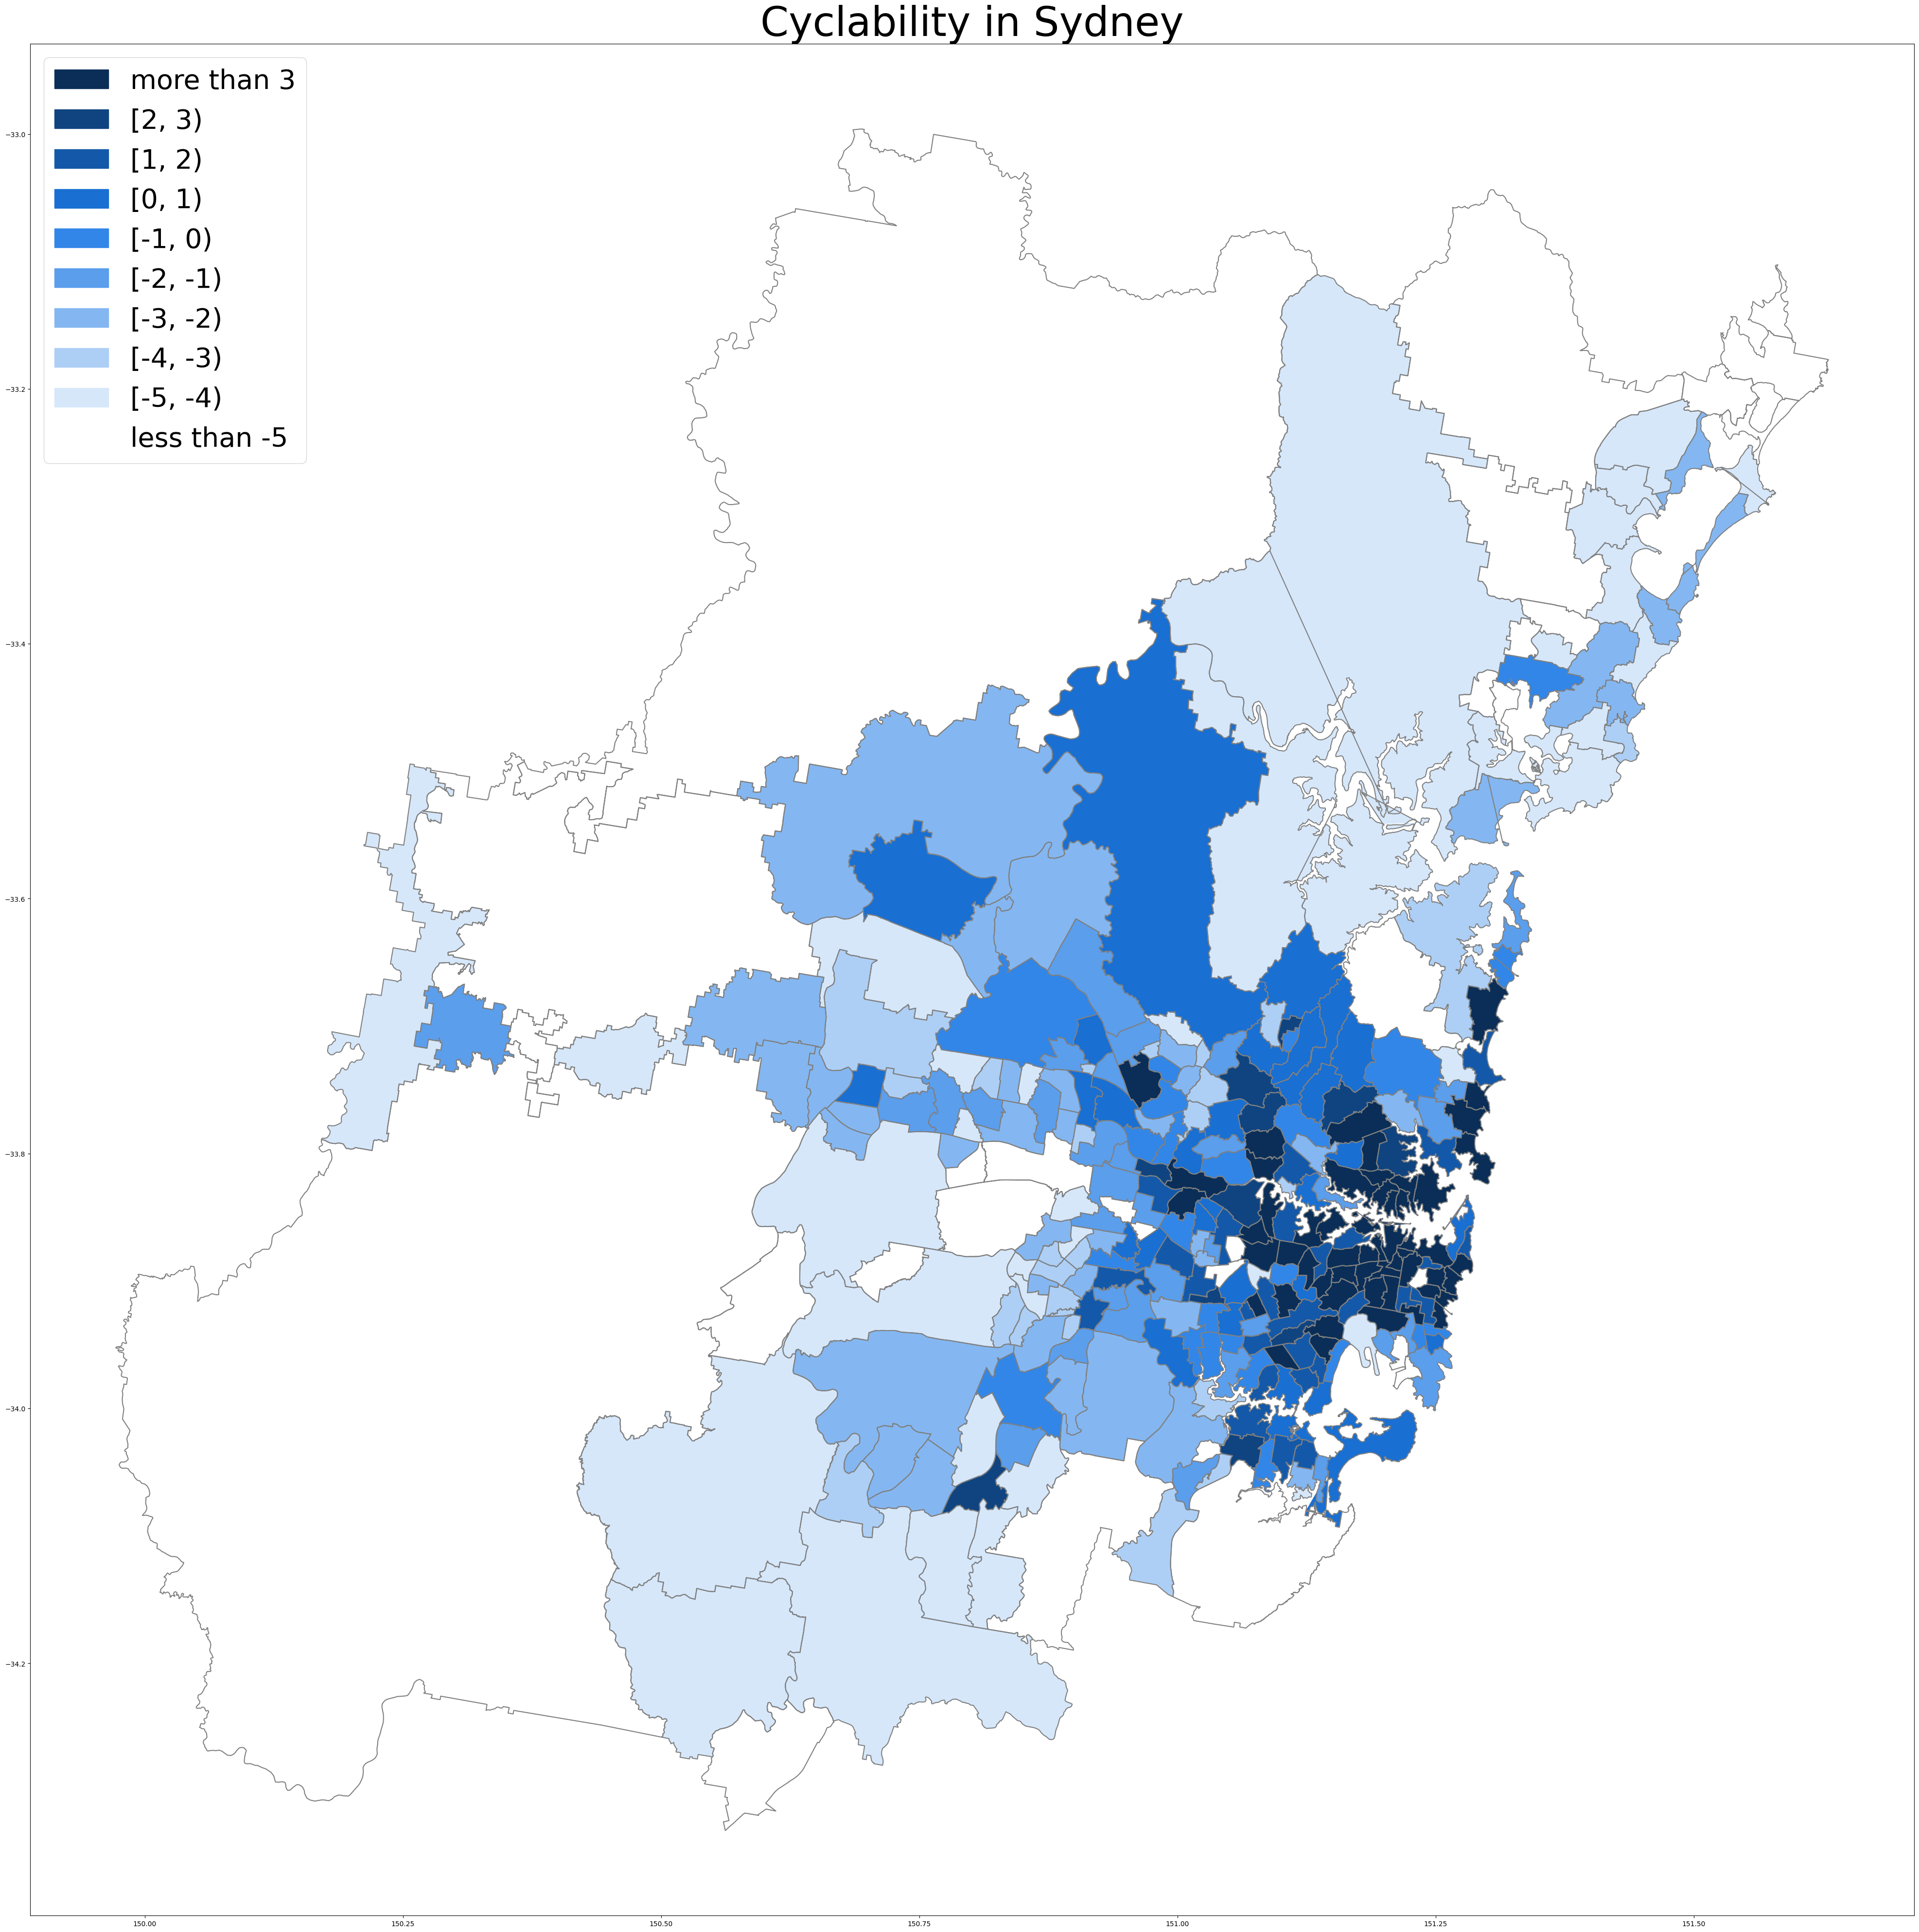

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# draw the map

plt.figure(figsize=(50,50))
colors = ['#ffffff', '#d6e7fa', '#adcff5', '#84b7f1','#5b9eec', '#3286e7', '#196fd2', '#1459a9', '#0f4480', '#0a2e57']
count = 0
for shape in sf.shapeRecords():
    if(shape.record[2] in name_list):
        s = score_cyclability[shape.record[0]]
        if s < -5:
            color = colors[0]
        elif s < -4:
            color = colors[1]
        elif s < -3:
            color = colors[2]
        elif s < -2:
            color = colors[3]
        elif s < -1:
            color = colors[4]
        elif s < 0:
            color = colors[5]
        elif s < 1:
            color = colors[6]
        elif s < 2:
            color = colors[7]
        elif s < 3:
            color = colors[8]
        else:
            color = colors[9]
        x = []
        y = []
        for i in shape.shape.points[:]:
            x.append(i[0])
            y.append(i[1])
        plt.plot(x,y, 'grey')
        plt.fill(x, y, color) 
        count+=1
        

level0 = mpatches.Patch(color=colors[0], label='less than -5')
level1 = mpatches.Patch(color=colors[1], label='[-5, -4)')
level2 = mpatches.Patch(color=colors[2], label='[-4, -3)')
level3 = mpatches.Patch(color=colors[3], label='[-3, -2)')
level4 = mpatches.Patch(color=colors[4], label='[-2, -1)')
level5 = mpatches.Patch(color=colors[5], label='[-1, 0)')
level6 = mpatches.Patch(color=colors[6], label='[0, 1)')
level7 = mpatches.Patch(color=colors[7], label='[1, 2)')
level8 = mpatches.Patch(color=colors[8], label='[2, 3)')
level9 = mpatches.Patch(color=colors[9], label='more than 3')
plt.legend(handles = [level9, level8, level7, level6, level5, level4, level3, level2, level1, level0], prop={'size': 40})
plt.title("Cyclability in Sydney", fontsize=60)
plt.show()

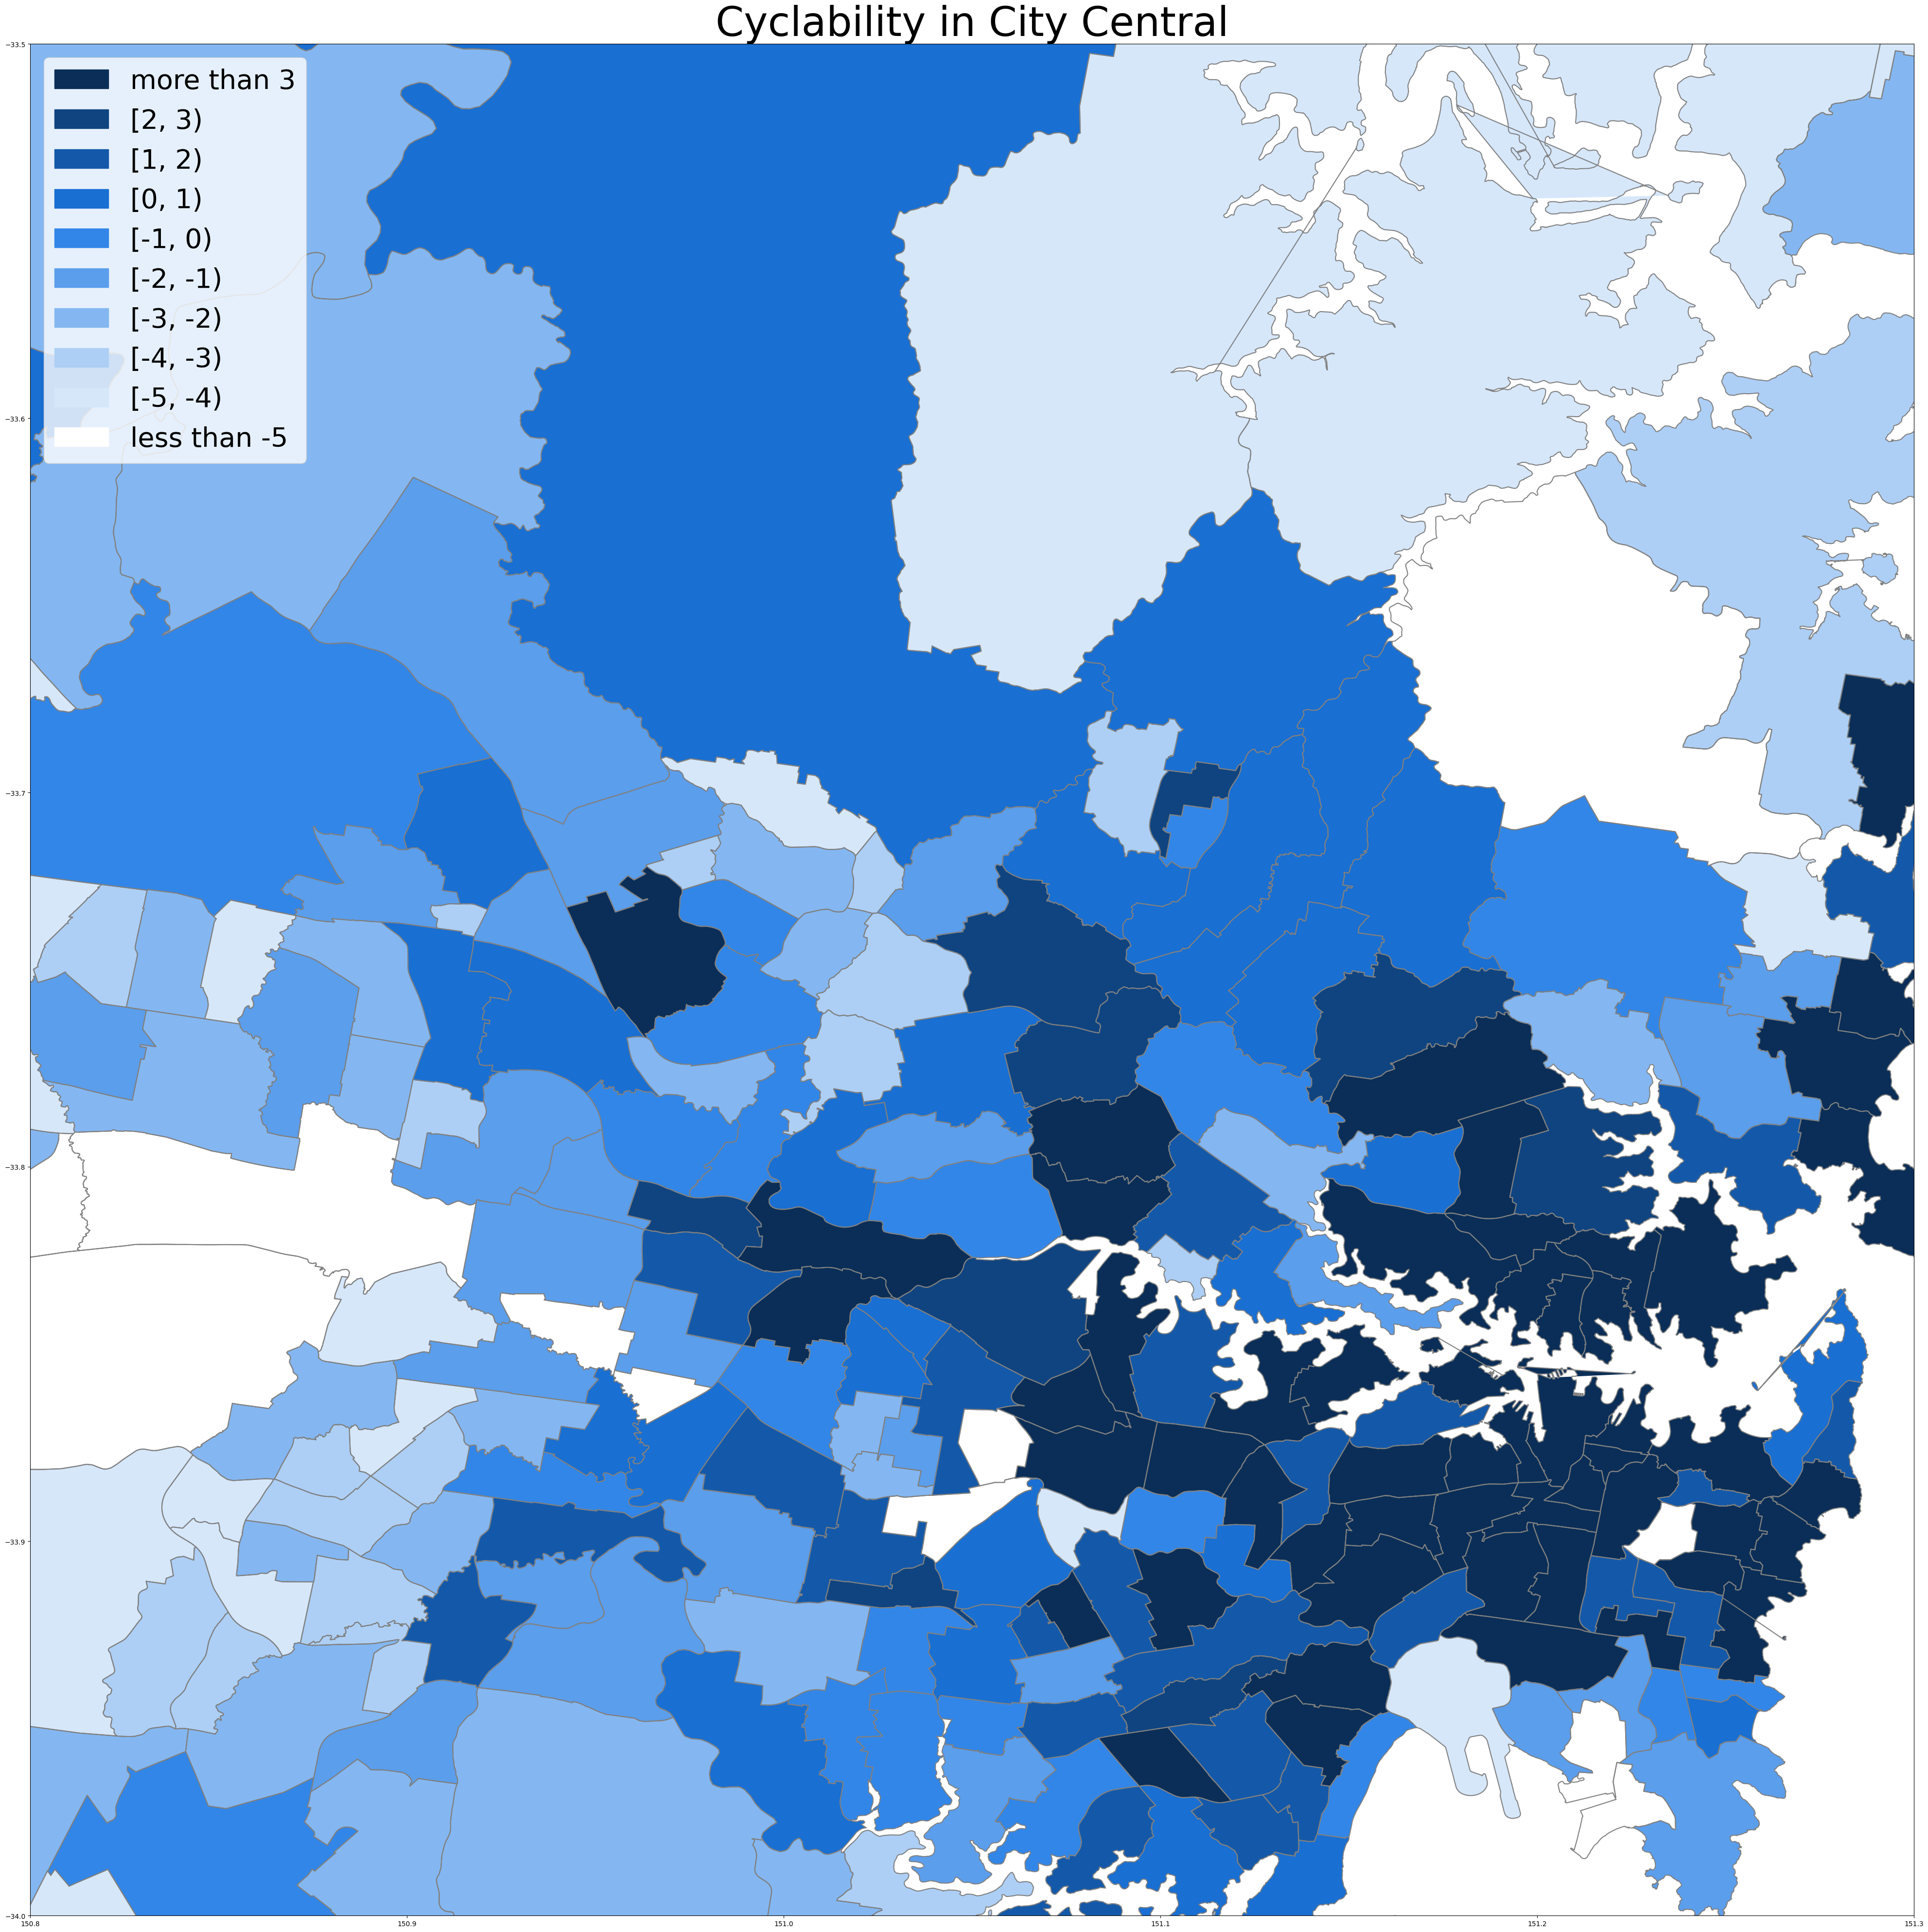

In [33]:
# zoom the map

plt.figure(figsize=(50,50))
colors = ['#ffffff', '#d6e7fa', '#adcff5', '#84b7f1','#5b9eec', '#3286e7', '#196fd2', '#1459a9', '#0f4480', '#0a2e57']
count = 0
for shape in sf.shapeRecords():
    if(shape.record[2] in name_list):
        s = score_cyclability[shape.record[0]]
        if s < -5:
            color = colors[0]
        elif s < -4:
            color = colors[1]
        elif s < -3:
            color = colors[2]
        elif s < -2:
            color = colors[3]
        elif s < -1:
            color = colors[4]
        elif s < 0:
            color = colors[5]
        elif s < 1:
            color = colors[6]
        elif s < 2:
            color = colors[7]
        elif s < 3:
            color = colors[8]
        else:
            color = colors[9]
        x = []
        y = []
        for i in shape.shape.points[:]:
            x.append(i[0])
            y.append(i[1])
        plt.plot(x,y, 'grey')
        plt.fill(x, y, color) 
        count+=1
        

level0 = mpatches.Patch(color=colors[0], label='less than -5')
level1 = mpatches.Patch(color=colors[1], label='[-5, -4)')
level2 = mpatches.Patch(color=colors[2], label='[-4, -3)')
level3 = mpatches.Patch(color=colors[3], label='[-3, -2)')
level4 = mpatches.Patch(color=colors[4], label='[-2, -1)')
level5 = mpatches.Patch(color=colors[5], label='[-1, 0)')
level6 = mpatches.Patch(color=colors[6], label='[0, 1)')
level7 = mpatches.Patch(color=colors[7], label='[1, 2)')
level8 = mpatches.Patch(color=colors[8], label='[2, 3)')
level9 = mpatches.Patch(color=colors[9], label='more than 3')
plt.axis([150.8,151.3,-34,-33.5])
plt.legend(handles = [level9, level8, level7, level6, level5, level4, level3, level2, level1, level0], prop={'size': 40}, loc = 2)
plt.title("Cyclability in City Central", fontsize=60)
plt.show()

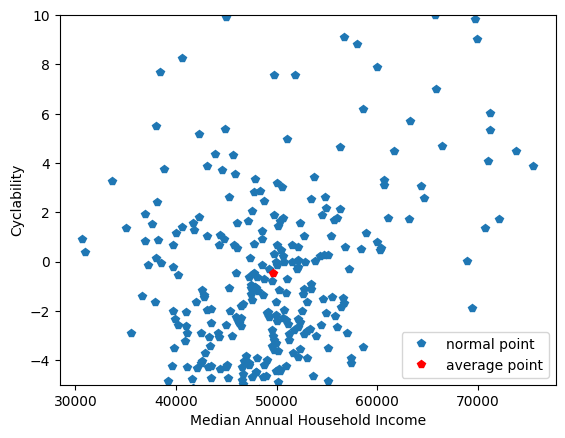

[[1.         0.36437988]
 [0.36437988 1.        ]]


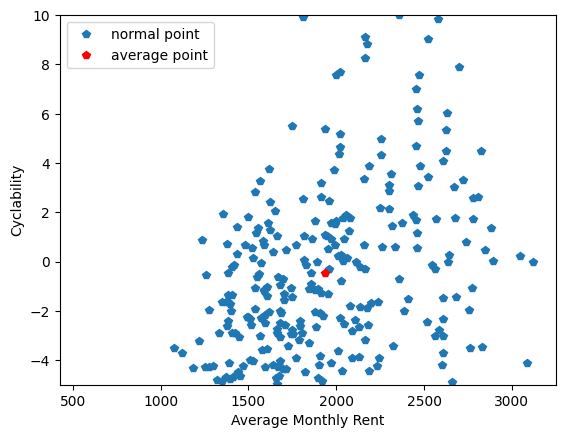

[[1.         0.44455885]
 [0.44455885 1.        ]]


In [34]:
from scipy.stats import linregress
import numpy

std = np.std(list(score_cyclability.values()))
avg = np.average(list(score_cyclability.values()))

x = []
y = []
z = []
for row in cyclability:
    if float(row['cyclability']) < avg + 2 * std and float(row['cyclability']) > avg - 2 * std:
        
        for each in data_CensusStats:
            if int(each['area_id']) == int(row['area_id']) and float(each['avg_monthly_rent']) != 0 and float(each['median_annual_household_income']) != 0:
                x.append(float(row['cyclability']))
                y.append(float(each['median_annual_household_income']))
                z.append(float(each['avg_monthly_rent']))
                break
            
plt.figure()
plt.plot(y, x, 'p')
plt.plot(np.average(y), np.average(x), 'pr')
plt.ylim(-5, 10)
plt.xlabel('Median Annual Household Income')
plt.ylabel('Cyclability')
plt.legend(['normal point', 'average point'])
plt.show()
print(numpy.corrcoef(x,y))

plt.figure()
plt.plot(z, x, 'p')
plt.plot(np.average(z), np.average(x), 'pr')
plt.ylim(-5, 10)
plt.xlabel('Average Monthly Rent')
plt.ylabel('Cyclability')
plt.legend(['normal point', 'average point'])
plt.show()
print(numpy.corrcoef(z,x))

In [35]:
std = np.std(list(score_cyclability.values()))
avg = np.average(list(score_cyclability.values()))
temp = []
for each in score_cyclability.keys():
    if(abs(score_cyclability[each] - avg) > 2 * std):
        temp.append(each)
for each in temp:
    del score_cyclability[each]

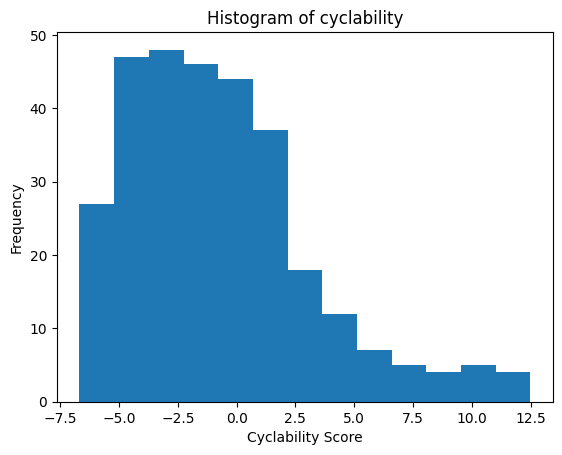

In [36]:
plt.hist(list(score_cyclability.values()), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of cyclability")
plt.xlabel("Cyclability Score")
plt.ylabel("Frequency")
plt.show()